# Company Bankruptcy Detection Model

In banking and finance field, effective bankruptcy prediction is a very important task since corporate finance is one of the major sources of income of commercial and investment banks. On one hand, the banks want to avoid the default risk of borrowers; on the other hand, they want to earn as much interest as possible by lending money to companies. This dilemma cannot be resolved easily as no one can predict the future and make perfect decisions. In this project, we try to implement supervised learning models to make effective bankruptcy prediction and hopefully we could provide insights into making lending decisions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 0. Import Dataset

Source of dataset: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

In [2]:
data = pd.read_csv('bankruptcy_data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.shape

(6819, 96)

The dataset contains 6819 observations (rows) of financial data from different companies. The 95 features (columns) in the dataset are financial ratios used as predictors in our analysis. The first column, Bankrupt?, is the response of each observation, with 1 being bankrupt and 0 being not bankrupt.

## 1. Data Preprocessing 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# remove the space before each column name

data.columns = data.columns.str.lstrip()
data.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [6]:
# duplicated values

data[data.duplicated()]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


In [7]:
# summary statistics

pd.set_option('display.max_rows', 100)
data_summary = data.describe().transpose()
data_summary

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,3.226280e-02,1.767102e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ROA(C) before interest and depreciation before interest,6819.0,5.051796e-01,6.068564e-02,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.000000e+00
ROA(A) before interest and % after tax,6819.0,5.586249e-01,6.562003e-02,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.000000e+00
ROA(B) before interest and depreciation after tax,6819.0,5.535887e-01,6.159481e-02,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.000000e+00
Operating Gross Margin,6819.0,6.079480e-01,1.693381e-02,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.000000e+00
Realized Sales Gross Margin,6819.0,6.079295e-01,1.691607e-02,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.000000e+00
Operating Profit Rate,6819.0,9.987551e-01,1.301003e-02,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.000000e+00
Pre-tax net Interest Rate,6819.0,7.971898e-01,1.286899e-02,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.000000e+00
After-tax net Interest Rate,6819.0,8.090836e-01,1.360065e-02,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.000000e+00
Non-industry income and expenditure/revenue,6819.0,3.036229e-01,1.116344e-02,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.000000e+00


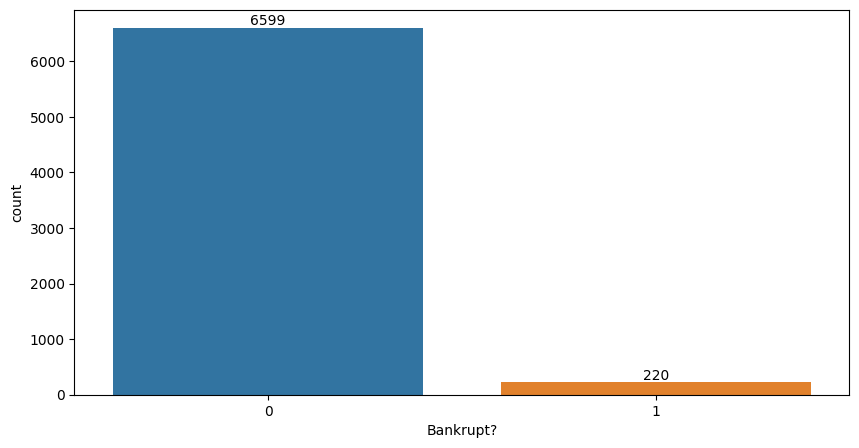

In [8]:
plt.figure(figsize=(10,5))

bankrupt_plt = sns.countplot(x=data['Bankrupt?'])
bankrupt_count = data['Bankrupt?'].value_counts(ascending=False).values
bankrupt_plt.bar_label(container=bankrupt_plt.containers[0], labels=bankrupt_count)

plt.show()

Observations:
1. There is a space before each column name, except the column Bankrupt?.
2. There is no missing data, wrong data type and duplicated row. 
3. However, some columns showed abnormal maximum values. 
4. Also, all values in the Net Income Flag column is the same, i.e. 1, and this column will be removed later.
5. There is a class imbalance issue of bankruptcy data - most of the samples are not bankrupt. 

In [9]:
drop_col = []
drop_col.append('Net Income Flag')

drop_col

['Net Income Flag']

In [10]:
# abnormal maximum values

abnormal_col = data_summary[data_summary['max'] > 1]
abnormal_col

,count,mean,std,min,25%,50%,75%,max
Operating Expense Rate,6819.0,1.995347e+09,3.237684e+09,0.0,1.566874e-04,2.777589e-04,4.145000e+09,9.990000e+09
Research and development expense rate,6819.0,1.950427e+09,2.598292e+09,0.0,1.281880e-04,5.090000e+08,3.450000e+09,9.980000e+09
Interest-bearing debt interest rate,6819.0,1.644801e+07,1.082750e+08,0.0,2.030203e-04,3.210321e-04,5.325533e-04,9.900000e+08
Revenue Per Share (Yuan ¥),6819.0,1.328641e+06,5.170709e+07,0.0,1.563138e-02,2.737571e-02,4.635722e-02,3.020000e+09
Total Asset Growth Rate,6819.0,5.508097e+09,2.897718e+09,0.0,4.860000e+09,6.400000e+09,7.390000e+09,9.990000e+09
Net Value Growth Rate,6819.0,1.566212e+06,1.141594e+08,0.0,4.409689e-04,4.619555e-04,4.993621e-04,9.330000e+09
Current Ratio,6819.0,4.032850e+05,3.330216e+07,0.0,7.555047e-03,1.058717e-02,1.626953e-02,2.750000e+09
Quick Ratio,6819.0,8.376595e+06,2.446847e+08,0.0,4.725903e-03,7.412472e-03,1.224911e-02,9.230000e+09
Total debt/Total net worth,6819.0,4.416337e+06,1.684069e+08,0.0,3.007049e-03,5.546284e-03,9.273293e-03,9.940000e+09
Accounts Receivable Turnover,6819.0,1.278971e+07,2.782598e+08,0.0,7.101336e-04,9.678107e-04,1.454759e-03,9.740000e+09


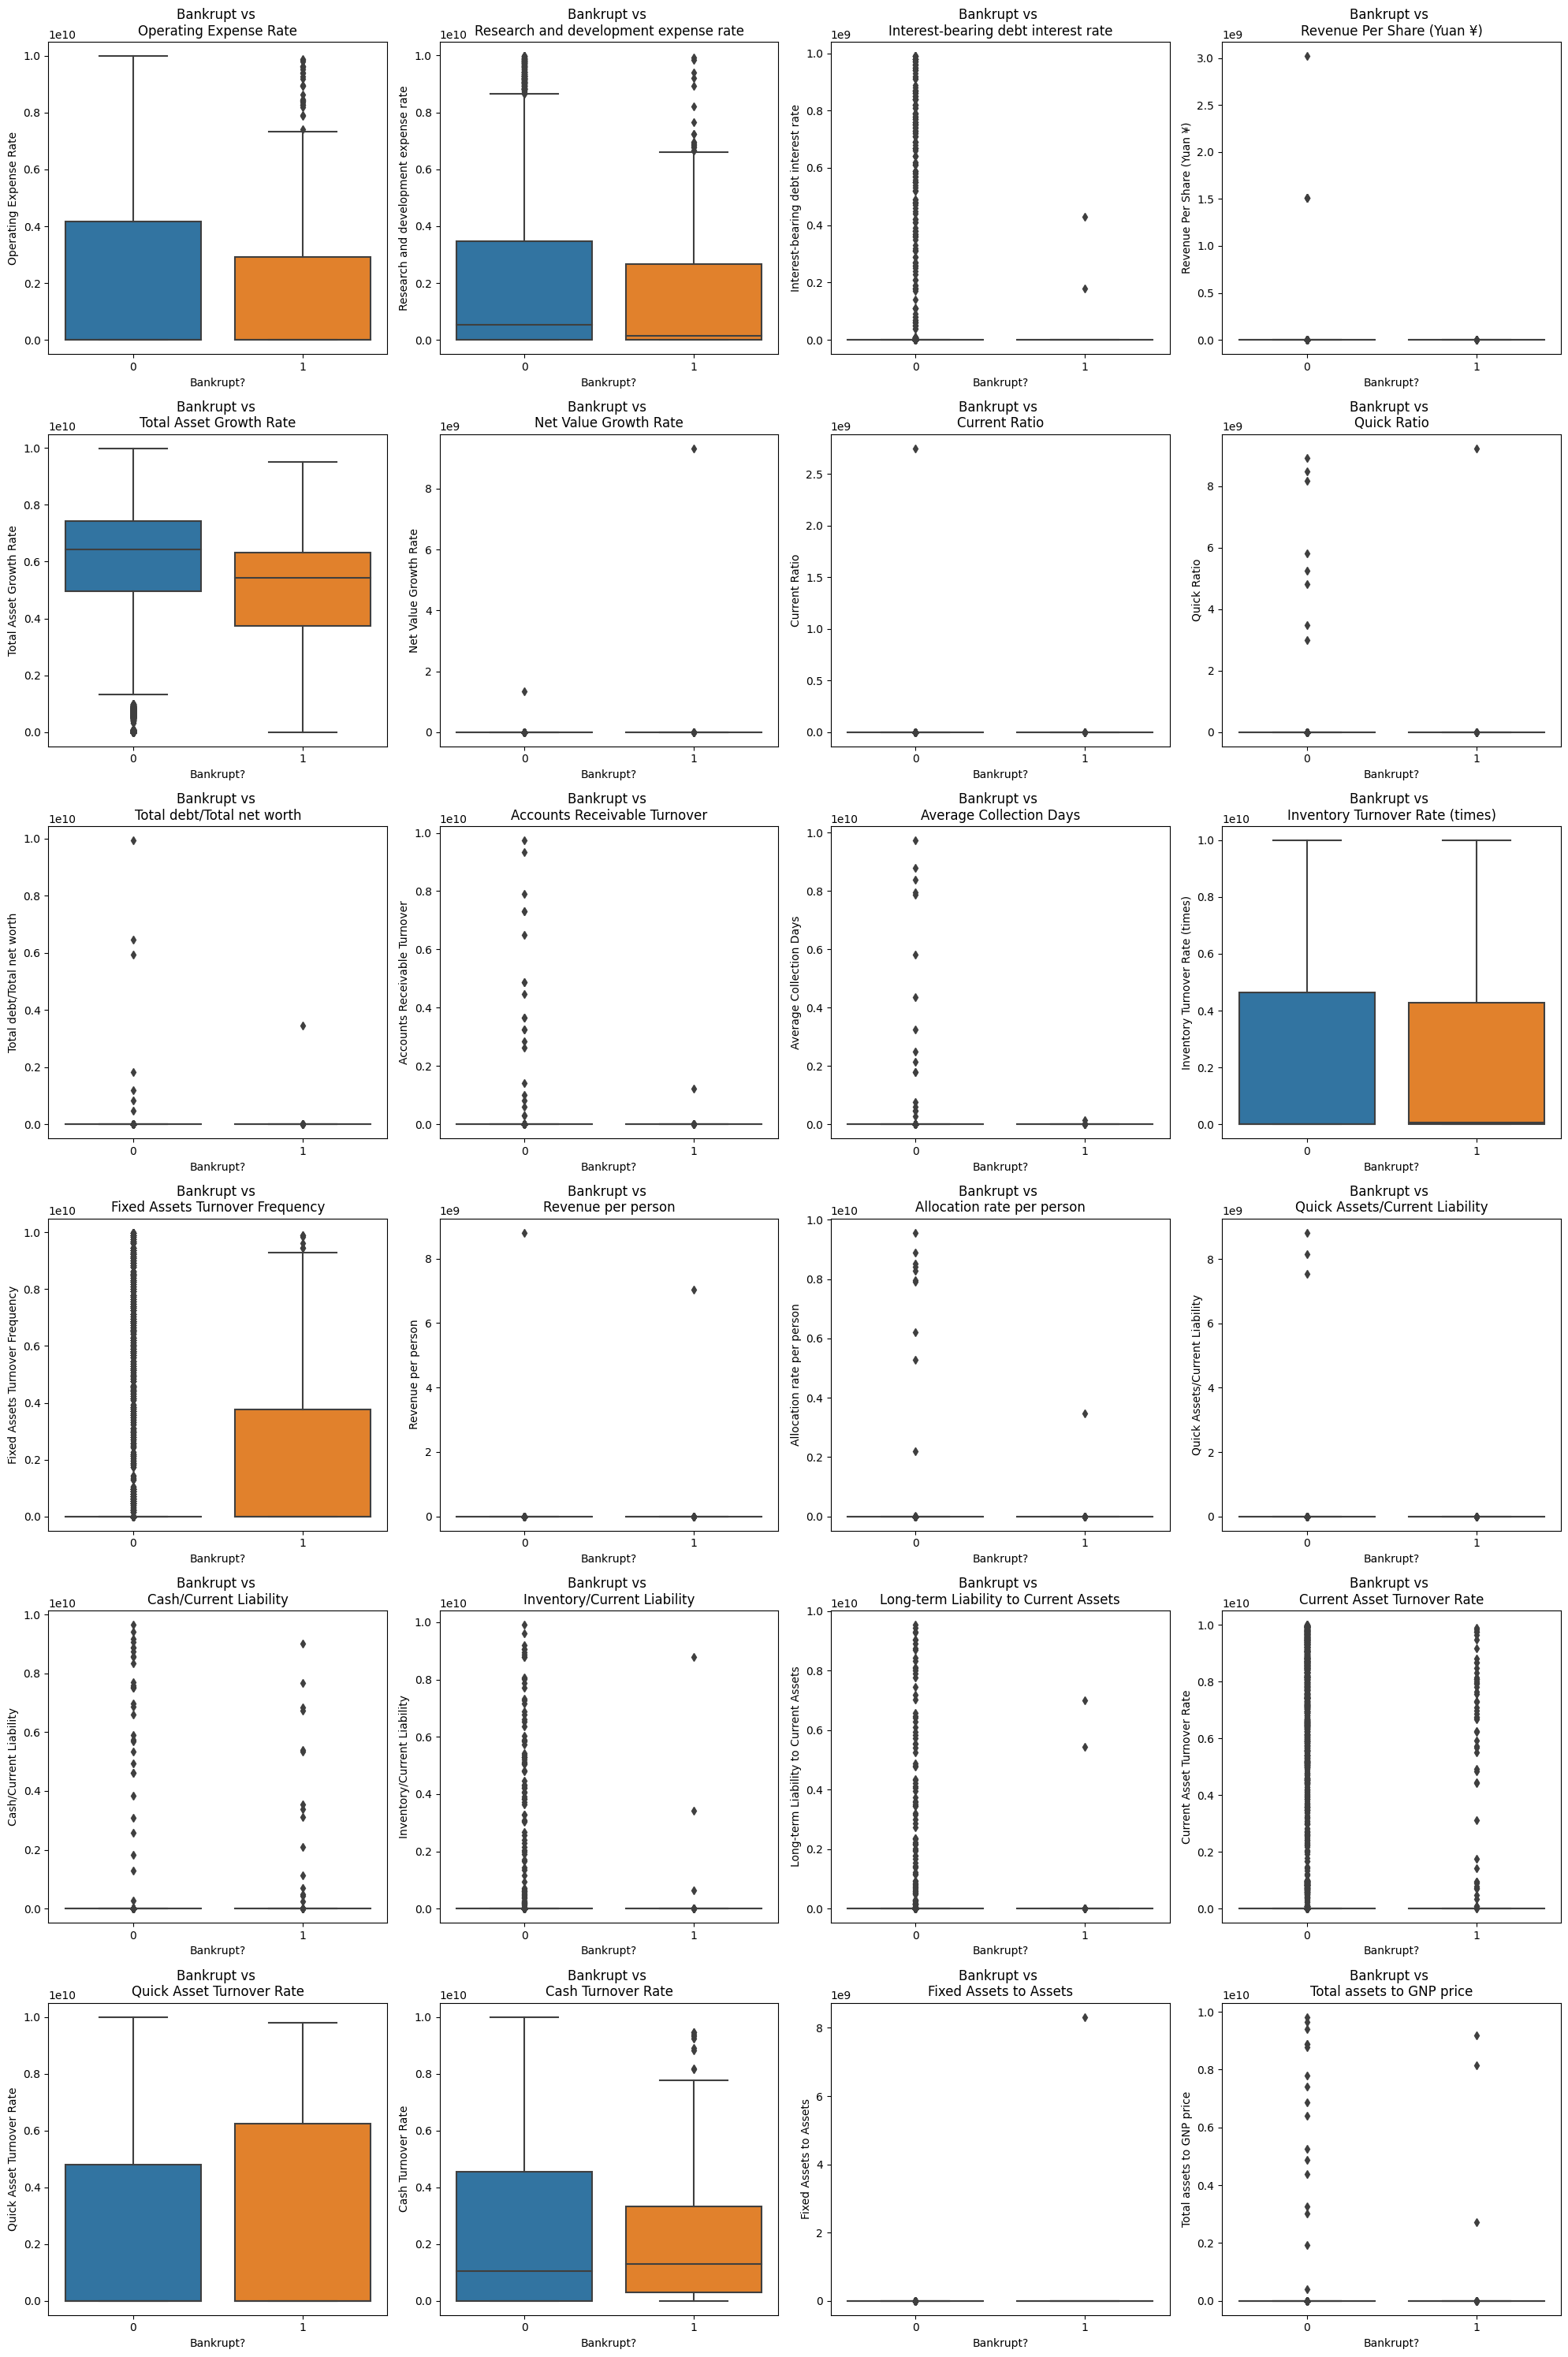

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,30))

for i in range(len(abnormal_col.index.values)):
    sns.boxplot(x='Bankrupt?', y=abnormal_col.index.values[i], data=data, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title('Bankrupt vs \n' + abnormal_col.index.values[i])

plt.tight_layout()
plt.show()

Based on the observation of min, median and max values, the following abnormal columns
1. have relatively more outliers: 'Interest-bearing debt interest rate', 'Cash/Current Liability', 'Inventory/Current Liability', 'Long-term Liability to Current Assets', 'Current Asset Turnover Rate'
2. have a few outliers: 'Revenue Per Share (Yuan ¥)', 'Net Value Growth Rate', 'Current Ratio', 'Quick Ratio', 'Total debt/Total net worth', 'Accounts Receivable Turnover', 'Average Collection Days', 'Revenue per person', 'Allocation rate per person', 'Quick Assets/Current Liability', 'Fixed Assets to Assets', 'Total assets to GNP price'
3. are not normalized: 'Operating Expense Rate', 'Research and development expense rate', 'Total Asset Growth Rate', 'Inventory Turnover Rate (times)', 'Fixed Assets Turnover Frequency', 'Quick Asset Turnover Rate', 'Cash Turnover Rate'

Normally, we would exclude the outliers from the dataset. Yet, since this is an anomaly detection task and the dataset has class imbalance issue, we should not remove the outliers.

In [12]:
# min-max scaling on abnormal data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[abnormal_col.index.values.tolist()] = scaler.fit_transform(data[abnormal_col.index.values.tolist()])
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,8.475867e-13,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,4.073610e-12,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,3.312093e-13,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,3.948639e-13,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,4.740433e-14,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,1.995150e-13,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,2.891940e-13,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,2.889201e-13,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.0
Realized Sales Gross Margin,6819.0,0.607929,0.016916,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.0
Operating Profit Rate,6819.0,0.998755,0.013010,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.0
Pre-tax net Interest Rate,6819.0,0.797190,0.012869,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.0
After-tax net Interest Rate,6819.0,0.809084,0.013601,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.0
Non-industry income and expenditure/revenue,6819.0,0.303623,0.011163,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.0


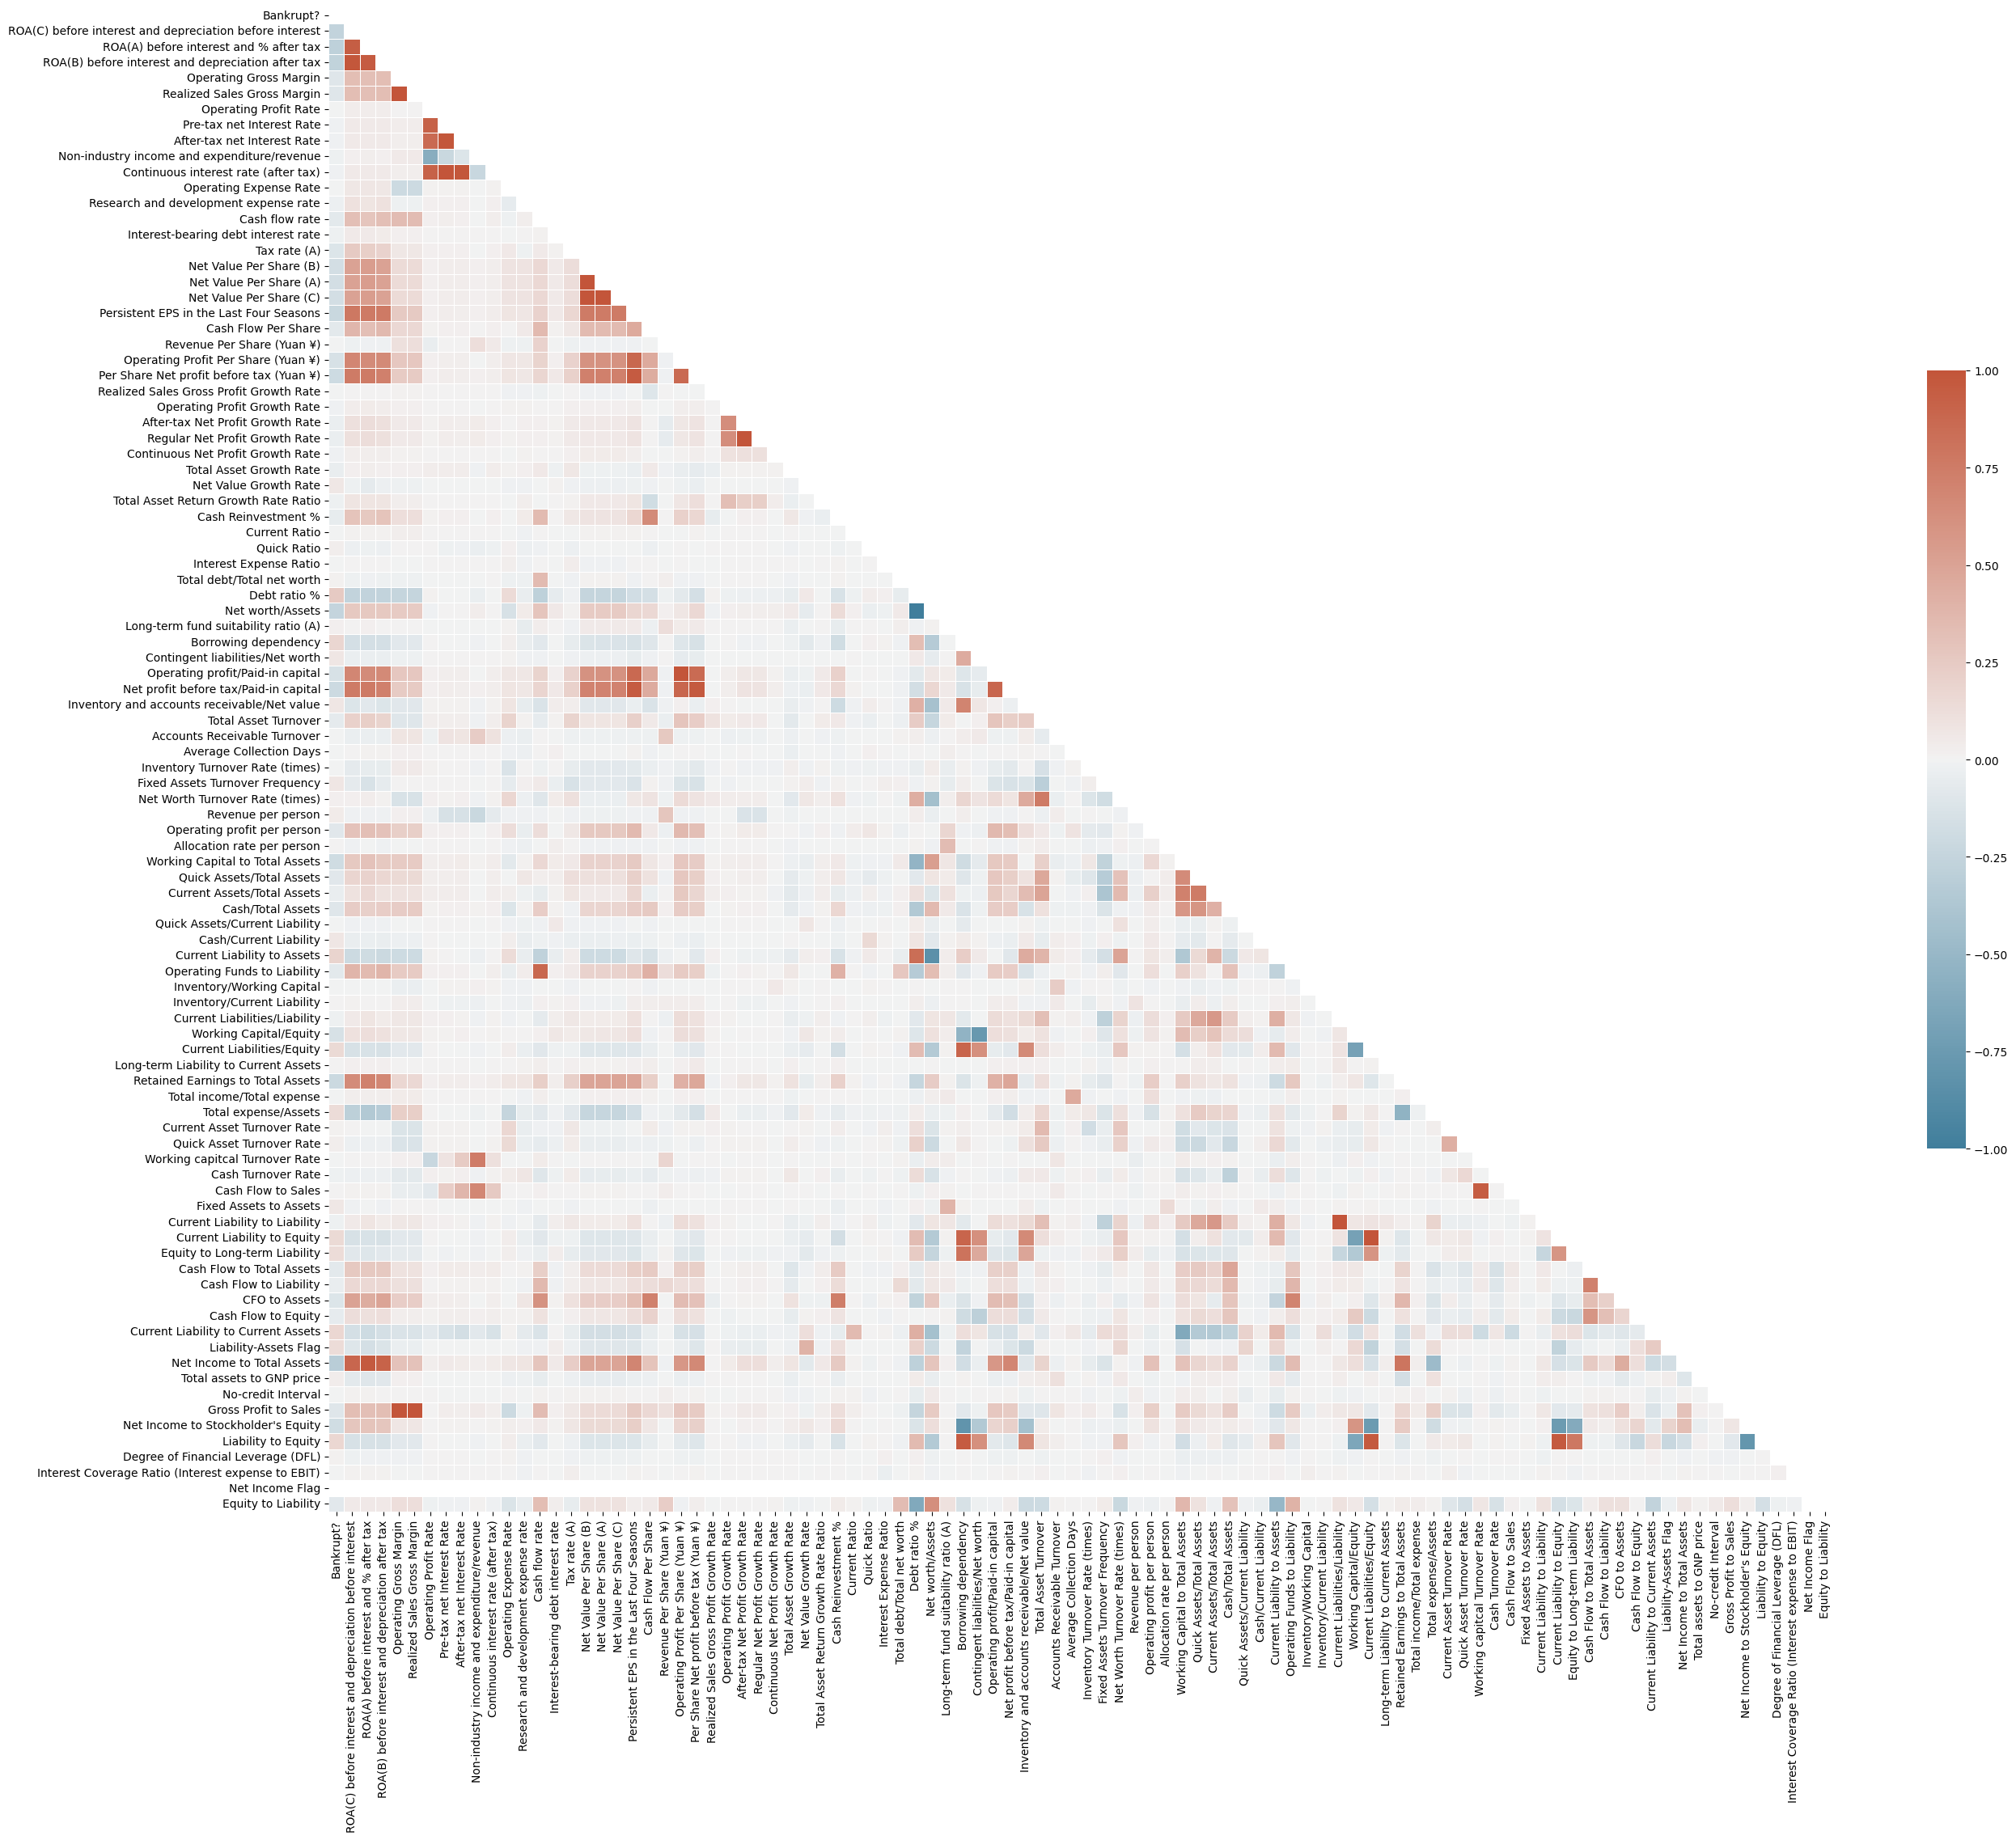

In [14]:
fig, ax = plt.subplots(figsize=(30, 25))
data_corr = data.corr()
mask = np.triu(np.ones_like(data_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [15]:
# perfect correlation pairs

for i in data_corr.columns:
    for j in data_corr.columns:
        if (data_corr.loc[i, j] == 1) and i != j:
            print(i, 'vs', j)

Current Liabilities/Liability vs Current Liability to Liability
Current Liabilities/Equity vs Current Liability to Equity
Current Liability to Liability vs Current Liabilities/Liability
Current Liability to Equity vs Current Liabilities/Equity


'Current Liabilities/Liability' and 'Current Liability to Liability' pair, 'Current Liabilities/Equity' and 'Current Liability to Equity' pair are perfectly correlated to each other. One of them have to be removed to avoid multicollinearity.

In [16]:
drop_col.append('Current Liabilities/Liability')
drop_col.append('Current Liabilities/Equity')
drop_col

['Net Income Flag',
 'Current Liabilities/Liability',
 'Current Liabilities/Equity']

In [17]:
# high correlation pairs

for i in data_corr.columns:
    for j in data_corr.columns:
        if (data_corr.loc[i, j] > 0.9) and i != j:
            print(i, 'vs', j)

ROA(C) before interest and depreciation before interest vs ROA(A) before interest and % after tax
ROA(C) before interest and depreciation before interest vs ROA(B) before interest and depreciation after tax
ROA(A) before interest and % after tax vs ROA(C) before interest and depreciation before interest
ROA(A) before interest and % after tax vs ROA(B) before interest and depreciation after tax
ROA(A) before interest and % after tax vs Net Income to Total Assets
ROA(B) before interest and depreciation after tax vs ROA(C) before interest and depreciation before interest
ROA(B) before interest and depreciation after tax vs ROA(A) before interest and % after tax
ROA(B) before interest and depreciation after tax vs Net Income to Total Assets
Operating Gross Margin vs Realized Sales Gross Margin
Operating Gross Margin vs Gross Profit to Sales
Realized Sales Gross Margin vs Operating Gross Margin
Realized Sales Gross Margin vs Gross Profit to Sales
Operating Profit Rate vs Pre-tax net Interes

Seems lots of feature pairs have very high correlation, though it is expected in financial variables. We will consider dimensionality reduction algorithm before training the models, especially when this dataset is small. 

In [18]:
data = data.drop(columns=drop_col)
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,8.475867e-13,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,4.073610e-12,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,3.312093e-13,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,3.948639e-13,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0,0.799927,4.740433e-14,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0,0.799748,1.995150e-13,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0,0.797778,2.891940e-13,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0,0.811808,2.889201e-13,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


In [19]:
# for housekeeping

# data.to_csv('data_cleaned.csv')

## 2. Data Transformation

In [20]:
X, y = data.drop(columns=['Bankrupt?']), data['Bankrupt?']

In [21]:
X, y = X.iloc[:,:].values, y.values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 2.1 Principle Component Analysis

The dataset only contains 6819 observations and 92 features. To reduce the spareness of the dataset, we will apply PCA to reduce the dimension of the dataset.

n_components: 1    variance explained: 0.174
n_components: 2    variance explained: 0.309
n_components: 3    variance explained: 0.419
n_components: 4    variance explained: 0.515
n_components: 5    variance explained: 0.605
n_components: 6    variance explained: 0.687
n_components: 7    variance explained: 0.755
n_components: 8    variance explained: 0.807
n_components: 9    variance explained: 0.852
n_components: 10    variance explained: 0.880
n_components: 11    variance explained: 0.903
n_components: 12    variance explained: 0.922
n_components: 13    variance explained: 0.934
n_components: 14    variance explained: 0.946
n_components: 15    variance explained: 0.955
n_components: 16    variance explained: 0.961
n_components: 17    variance explained: 0.966
n_components: 18    variance explained: 0.969
n_components: 19    variance explained: 0.973
n_components: 20    variance explained: 0.976
n_components: 21    variance explained: 0.978
n_components: 22    variance explained: 0.9

Text(0, 0.5, 'Variance Explained')

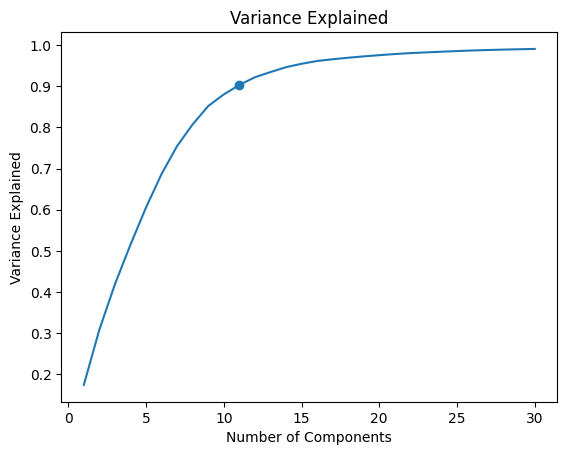

In [23]:
from sklearn.decomposition import PCA

plot_x = []
plot_y = []

for n_comp in range(1,31):
    pca = PCA(n_components=n_comp, whiten=True, random_state=1)
    pca_model = pca.fit(X_train)
    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %pca_model.explained_variance_ratio_.sum())
    plot_x.append(n_comp)
    plot_y.append(pca_model.explained_variance_ratio_.sum())
    
plt.plot(plot_x, plot_y)
plt.scatter(plot_x[10], plot_y[10])
plt.title('Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')

11 principle components can explain 90% of variability of the dataset. That's good enough. Therefore, we will apply PCA on the dataset with 11 principle components.

In [24]:
pca = PCA(n_components=11, whiten=True, random_state=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [25]:
X_train_pca.shape

(5455, 11)

In [26]:
y_train.shape

(5455,)

### 2.2 SMOTE (Oversampling)

The class imbalance issue has made the prediction difficult. Given 97% of the observations are not bankrupt, if one blindly guesses all test data to be not bankruptcy, the accuracy is 97%. Also, high recall and presicion will be yield as well. It certainly provides no predictive power over the unseen data. Hence, to solve this issue, one may consider oversampling or undersampling techniques. For simplicity, we do not consider undersampling in this project as there are lots of ways to randomly generate subsets of samples. 

In [27]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=1)
X_train_pca_smote, y_train_pca_smote = oversample.fit_resample(X_train_pca, y_train)

In [28]:
X_train_pca_smote.shape

(10570, 11)

In [29]:
y_train_pca_smote.shape

(10570,)

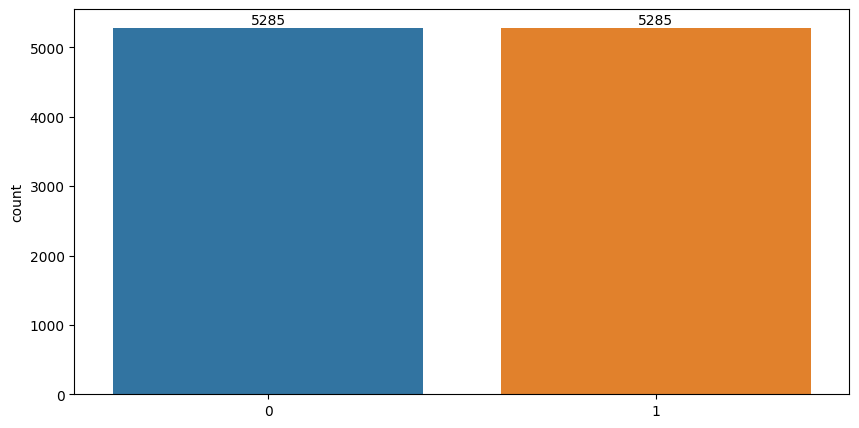

In [30]:
plt.figure(figsize = (10,5))

bankrupt_smote_plt = sns.countplot(x=y_train_pca_smote)
bankrupt_smote_count = pd.DataFrame(y_train_pca_smote).value_counts(ascending=False).values
bankrupt_smote_plt.bar_label(container=bankrupt_smote_plt.containers[0], labels=bankrupt_smote_count)

plt.show()

Now, the class is balanced.

## 3. Modelling

There are few common metrics for us to evaluate the fitness of the model - accuracy, precision, recall, and f1 score. Since financial institutions would like to prevent lending to companies going bankrupt after the lend, it is of utmost importance that the false negative of the model is minimized. Hence, we will focus on maximize the recall for each model. Higher recall means there are fewer loans issued to corporates that go bankrupt among all lending cases.

In [31]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [32]:
X_train, y_train = X_train_pca_smote, y_train_pca_smote
X_test = X_test_pca

### 3.1 SGD Classifier

In [33]:
sgdc = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, l1_ratio=0.15, \
                     learning_rate='optimal', random_state=1, max_iter=10000)

In [34]:
sgdc.fit(X_train, y_train)
y_pred_sgdc = sgdc.predict(X_test)  
y_prob_sgdc = sgdc.predict_proba(X_test)[:, 1]   

In [35]:
acc_sgdc = accuracy_score(y_test, y_pred_sgdc)
prec_sgdc = precision_score(y_test, y_pred_sgdc)
rec_sgdc = recall_score(y_test, y_pred_sgdc)
f1_sgdc = f1_score(y_test, y_pred_sgdc)

model_results = pd.DataFrame([['SGD Classifier', acc_sgdc, prec_sgdc, rec_sgdc, f1_sgdc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.843109,0.149573,0.7,0.246479


In [36]:
# optimization with Grid Search
hyperparameters_sgdc = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001] , 
                       'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1], 
                       'penalty': ['l1', 'l2', 'elasticnet'],
                       'loss': ['hinge', 'log', 'squared_hinge'] }

In [37]:
gs_sgdc = GridSearchCV(estimator=sgdc, param_grid=hyperparameters_sgdc, cv = 5, scoring = 'recall', verbose = 0, n_jobs = -1)

In [38]:
best_sgdc = gs_sgdc.fit(X_train, y_train)

In [39]:
best_parameters = best_sgdc.best_params_
best_parameters

{'alpha': 0.001, 'l1_ratio': 0.2, 'loss': 'hinge', 'penalty': 'elasticnet'}

In [40]:
y_pred_best_sgdc = best_sgdc.predict(X_test)

In [41]:
acc_best_sgdc = accuracy_score(y_test, y_pred_best_sgdc)
prec_best_sgdc = precision_score(y_test, y_pred_best_sgdc)
rec_best_sgdc = recall_score(y_test, y_pred_best_sgdc)
f1_best_sgdc = f1_score(y_test, y_pred_best_sgdc)

results_sgdc = pd.DataFrame([['SGD Classifier + Grid Search', acc_best_sgdc,prec_best_sgdc,rec_best_sgdc, f1_best_sgdc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = pd.concat([model_results, results_sgdc], ignore_index = True, axis=0)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.843109,0.149573,0.70,0.246479
1,SGD Classifier + Grid Search,0.854106,0.168889,0.76,0.276364


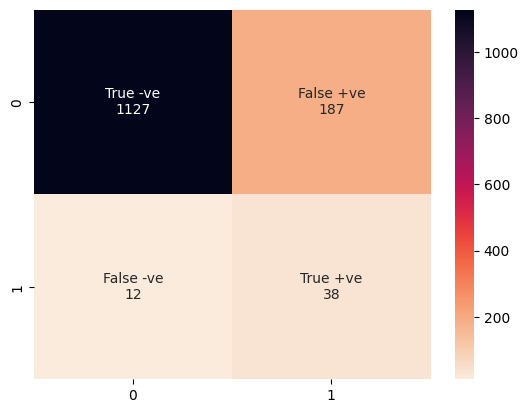

In [42]:
cf_matrix_sgdc = confusion_matrix(y_test,y_pred_best_sgdc)
group_names = ['True -ve','False +ve','False -ve','True +ve']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_sgdc.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_sgdc, annot=labels, cmap='rocket_r', fmt=''); plt.show()

### 3.2 XGBoost

In [43]:
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', max_depth=4, use_label_encoder=False, \
                    eta=0.001, random_state=1)

In [44]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)  
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [45]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

results_xgb = pd.DataFrame([['XGBoost Classifier', acc_xgb,prec_xgb,rec_xgb, f1_xgb]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = pd.concat([model_results, results_xgb], ignore_index=True, axis=0)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.843109,0.149573,0.70,0.246479
1,SGD Classifier + Grid Search,0.854106,0.168889,0.76,0.276364
2,XGBoost Classifier,0.781525,0.110063,0.70,0.190217


In [46]:
# optimization
hyperparameters_xgb = {'lambda': [0.5, 1, 1.5, 2],
                       'alpha' : [0, 0.5, 1],
                       'eta': [0.001, 0.01, 0.1],
                       'max_depth': [3, 5, 7, 9]
                      }

In [47]:
gs_xgb = GridSearchCV(estimator=xgb, param_grid=hyperparameters_xgb, cv=5, scoring='recall', verbose=0, n_jobs=-1)

In [48]:
best_xgb = gs_xgb.fit(X_train, y_train)

In [49]:
best_parameters = best_xgb.best_params_
best_parameters

{'alpha': 0, 'eta': 0.001, 'lambda': 0.5, 'max_depth': 9}

In [50]:
y_pred_best_xgb = best_xgb.predict(X_test)

In [51]:
acc_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
prec_best_xgb = precision_score(y_test, y_pred_best_xgb)
rec_best_xgb = recall_score(y_test, y_pred_best_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)

results_best_xgb = pd.DataFrame([['XGB Classifier + Grid Search', acc_best_xgb,prec_best_xgb,rec_best_xgb, f1_best_xgb]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = pd.concat([model_results, results_best_xgb], ignore_index=True, axis=0)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.843109,0.149573,0.70,0.246479
1,SGD Classifier + Grid Search,0.854106,0.168889,0.76,0.276364
2,XGBoost Classifier,0.781525,0.110063,0.70,0.190217
3,XGB Classifier + Grid Search,0.874633,0.128834,0.42,0.197183


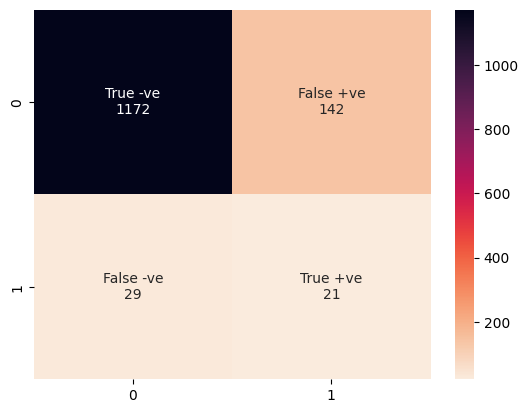

In [52]:
cf_matrix_xgb = confusion_matrix(y_test,y_pred_best_xgb)
group_names = ['True -ve','False +ve','False -ve','True +ve']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_xgb.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_xgb, annot=labels, cmap='rocket_r', fmt=''); plt.show()

### 3.3 One-class SVM

In [53]:
svm = OneClassSVM(nu=0.2, kernel='linear')

In [54]:
svm = svm.fit(X_train)

# Prediction
y_pred_svm = svm.predict(X_test)

# relabelling
y_pred_svm[y_pred_svm == 1] = 0
y_pred_svm[y_pred_svm == -1] = 1

In [55]:
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

model_results_svm = pd.DataFrame([['One-class SVM', acc_svm, prec_svm, rec_svm, f1_svm]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = pd.concat([model_results, model_results_svm], ignore_index=True, axis=0)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.843109,0.149573,0.70,0.246479
1,SGD Classifier + Grid Search,0.854106,0.168889,0.76,0.276364
2,XGBoost Classifier,0.781525,0.110063,0.70,0.190217
3,XGB Classifier + Grid Search,0.874633,0.128834,0.42,0.197183
4,One-class SVM,0.284457,0.044291,0.90,0.084428


In [56]:
# optimization
hyperparameters_svm = {'kernel': ['rbf', 'linear'],
                        'nu': [0.1, 0.15, 0.2, 0.25, 0.5]        
                       }

In [57]:
gs_svm = GridSearchCV(estimator=svm, param_grid=hyperparameters_svm, cv=5, scoring='recall', verbose=0, n_jobs=-1)

In [58]:
best_svm = gs_svm.fit(X_train, y_train)

C:\Users\bosco\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


In [59]:
best_parameters = best_svm.best_params_
best_parameters

{'kernel': 'rbf', 'nu': 0.1}

In [60]:
y_pred_best_svm = best_svm.predict(X_test)

# Inliers are labelled as 0
y_pred_best_svm[y_pred_best_svm == 1] = 0

# Outliers are labelled as 1
y_pred_best_svm[y_pred_best_svm == -1] = 1

In [61]:
acc_best_svm = accuracy_score(y_test, y_pred_best_svm)
prec_best_svm = precision_score(y_test, y_pred_best_svm)
rec_best_svm = recall_score(y_test, y_pred_best_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm)

result_best_svm = pd.DataFrame([['One-class SVM + Grid Search', acc_best_svm, prec_best_svm, rec_best_svm, f1_best_svm]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = pd.concat([model_results, result_best_svm], ignore_index = True, axis=0)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.843109,0.149573,0.70,0.246479
1,SGD Classifier + Grid Search,0.854106,0.168889,0.76,0.276364
2,XGBoost Classifier,0.781525,0.110063,0.70,0.190217
3,XGB Classifier + Grid Search,0.874633,0.128834,0.42,0.197183
4,One-class SVM,0.284457,0.044291,0.90,0.084428
5,One-class SVM + Grid Search,0.802786,0.041841,0.20,0.069204


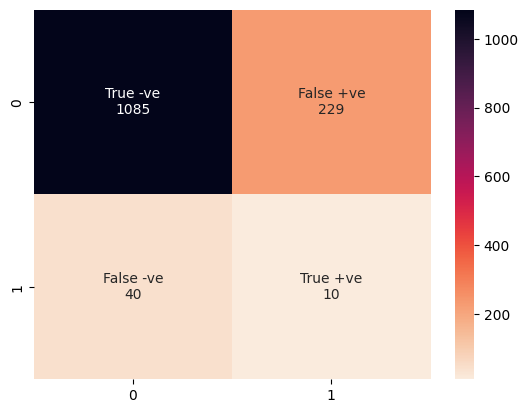

In [62]:
cf_matrix_svm = confusion_matrix(y_test,y_pred_best_svm)
group_names = ['True -ve','False +ve','False -ve','True +ve']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_svm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_svm, annot=labels, cmap='rocket_r', fmt='')
plt.show()

### 3.4 Isolation Forest

In [63]:
isof = IsolationForest(n_estimators=100, random_state=1, bootstrap=True)

In [64]:
# Fitting the isolation forest model
isof = isof.fit(X_train)

# Prediction
y_pred_isof = isof.predict(X_test)

# relabelling
y_pred_isof[y_pred_isof == 1] = 0
y_pred_isof[y_pred_isof == -1] = 1

In [65]:
acc_isof = accuracy_score(y_test, y_pred_isof)
prec_isof = precision_score(y_test, y_pred_isof)
rec_isof = recall_score(y_test, y_pred_isof)
f1_isof = f1_score(y_test, y_pred_isof)

model_results_isof = pd.DataFrame([['Isolation forest', acc_isof, prec_isof, rec_isof, f1_isof]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = pd.concat([model_results, model_results_isof], ignore_index=True, axis=0)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.843109,0.149573,0.70,0.246479
1,SGD Classifier + Grid Search,0.854106,0.168889,0.76,0.276364
2,XGBoost Classifier,0.781525,0.110063,0.70,0.190217
3,XGB Classifier + Grid Search,0.874633,0.128834,0.42,0.197183
4,One-class SVM,0.284457,0.044291,0.90,0.084428
5,One-class SVM + Grid Search,0.802786,0.041841,0.20,0.069204
6,Isolation forest,0.817449,0.009852,0.04,0.015810


In [66]:
# optimization
hyperparameters_isof = {'n_estimators': list(range(10, 100, 10)),
                        'max_features': list(range(1,12))        
                       }

In [67]:
gs_isof = GridSearchCV(estimator=isof, param_grid=hyperparameters_isof, cv=5, scoring='recall', verbose=0, n_jobs=-1)

In [68]:
best_isof = gs_isof.fit(X_train, y_train)

C:\Users\bosco\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


In [69]:
best_parameters = best_isof.best_params_
best_parameters

{'max_features': 1, 'n_estimators': 10}

In [70]:
y_pred_best_isof = best_isof.predict(X_test)

# Inliers are labelled as 0
y_pred_best_isof[y_pred_best_isof == 1] = 0

# Outliers are labelled as 1
y_pred_best_isof[y_pred_best_isof == -1] = 1

In [71]:
acc_best_isof = accuracy_score(y_test, y_pred_best_isof)
prec_best_isof = precision_score(y_test, y_pred_best_isof)
rec_best_isof = recall_score(y_test, y_pred_best_isof)
f1_best_isof = f1_score(y_test, y_pred_best_isof)

result_best_isof = pd.DataFrame([['Isolation forest + Grid Search', acc_best_isof, prec_best_isof, rec_best_isof, f1_best_isof]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = pd.concat([model_results, result_best_isof], ignore_index=True, axis=0)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.843109,0.149573,0.70,0.246479
1,SGD Classifier + Grid Search,0.854106,0.168889,0.76,0.276364
2,XGBoost Classifier,0.781525,0.110063,0.70,0.190217
3,XGB Classifier + Grid Search,0.874633,0.128834,0.42,0.197183
4,One-class SVM,0.284457,0.044291,0.90,0.084428
5,One-class SVM + Grid Search,0.802786,0.041841,0.20,0.069204
6,Isolation forest,0.817449,0.009852,0.04,0.015810
7,Isolation forest + Grid Search,0.601906,0.039252,0.42,0.071795


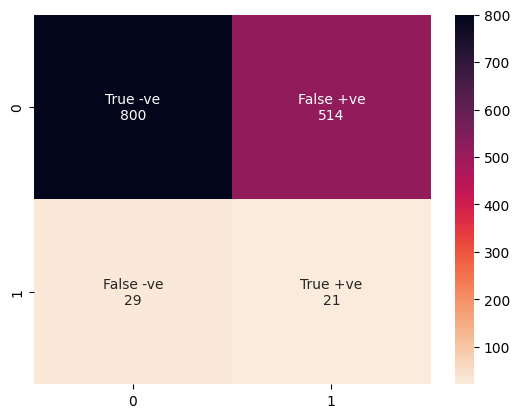

In [72]:
cf_matrix_isof = confusion_matrix(y_test,y_pred_best_isof)
group_names = ['True -ve','False +ve','False -ve','True +ve']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_isof.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_isof, annot=labels, cmap='rocket_r', fmt=''); plt.show()

## 4. Vote Ensemble and Model Evaluation

In [73]:
# vote ensemble
vote = pd.DataFrame({'y_test': y_test,
                     'SGD Classifier Pred': y_pred_best_sgdc,
                     'XGBoost Pred': y_pred_best_xgb,
                     'One-class SVM Pred': y_pred_best_svm,
                     'Isolation Forest Pred': y_pred_best_isof})

vote['# of vote'] = vote['SGD Classifier Pred'] + vote['XGBoost Pred'] + vote['One-class SVM Pred'] + vote['Isolation Forest Pred']
vote

,y_test,SGD Classifier Pred,XGBoost Pred,One-class SVM Pred,Isolation Forest Pred,# of vote
0,0,0,0,0,0,0
1,0,0,0,0,1,1
2,0,1,1,0,1,3
3,0,0,0,0,0,0
4,0,0,0,1,0,1
...,...,...,...,...,...,...
1359,0,1,1,0,0,2
1360,0,1,0,0,0,1
1361,0,0,0,1,0,1
1362,0,0,0,0,1,1


In [75]:
for i in range(1,5):
    vote_accuracy = len(vote[(vote['# of vote'] >= i) & (vote['y_test'] == 1)]) / len(vote[vote['# of vote'] >= i])
    print(f'Accuracy of vote if the model predicts bankruptcy with more than or equal to {i} vote: ' + str(vote_accuracy))

Accuracy of vote if the model predicts bankruptcy with more than or equal to 1 vote: 0.05867014341590613
Accuracy of vote if the model predicts bankruptcy with more than or equal to 2 vote: 0.09937888198757763
Accuracy of vote if the model predicts bankruptcy with more than or equal to 3 vote: 0.17391304347826086
Accuracy of vote if the model predicts bankruptcy with more than or equal to 4 vote: 0.25


The best result we can get by predicting bankruptcy of companies is 25%. Compared to 3% of bankruptcy class, the result is surely more convincing than blind guessing. 

Also, after training the models and optimization, it is noticible that these models have a trade-off between precision and recall. When we try to increase recall, it is inevitable that precision will drop. It fits the reality discussed at the beginning of the project - we cannot capture all potential interest while dodging all bankruptcy cases. 

## 5. Limitations, Bias and Potential Improvement

1. During data preprocessing, we decided not to remove the outliers in this anomaly detection task. This poses possible impact on subsequent Principle Component Analysis and oversampling (SMOTE) procedures.
    - For PCA, outliers might significantly shift the principle directions.
    - For SMOTE, outliers might significantly affect sampling pool and thus synthesize a lot more outliers.

   Hence, these may affect the model accuracies. 


2. Different principle components could be used and may affect the model results.
3. Anomaly detection algorithms like isolation forest and one-class SVM seem to perform weak in this dataset and after data transformation. It is possible that these algorithms could perform significantly better without data transformation.
4. More hyperparameter combinations could be tested and they might lead to better results. 